# Libraries

In [18]:
import sys
sys.path.insert(1, 'd:/GitHub/speech-emotion-recognition-system')   # caution: path[0] is reserved for script path (or '' in REPL)

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training
from sklearn import linear_model
from sklearn import metrics
import copy
from mv_utils import lasso_rank, LDA_LOSO_eval
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Loading Dataset

In [57]:
X, y, ID = data_loader.load_dataset(X_path='../data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='../data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='../data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 

data loaded in 0.190657377243042ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302  

## Full cycle of feature selection

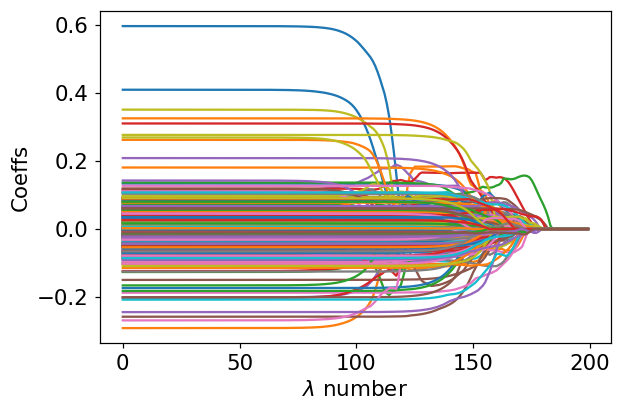

Iter =  1  AUC = 0.5070
Iter =  5  AUC = 0.5146
Iter =  6  AUC = 0.5553
Iter =  7  AUC = 0.5767
Iter =  8  AUC = 0.5797
Iter =  9  AUC = 0.5927
Iter =  10  AUC = 0.6018
Iter =  11  AUC = 0.6156
Iter =  13  AUC = 0.6238
Iter =  15  AUC = 0.6298
Iter =  16  AUC = 0.6360
Iter =  17  AUC = 0.6364
Iter =  18  AUC = 0.6518
Iter =  19  AUC = 0.6595
Iter =  21  AUC = 0.6641
Iter =  22  AUC = 0.6705
Iter =  25  AUC = 0.6745
Iter =  26  AUC = 0.6907
Iter =  27  AUC = 0.6931
Iter =  29  AUC = 0.6963
Iter =  30  AUC = 0.7063
Iter =  31  AUC = 0.7127
Iter =  33  AUC = 0.7137
Iter =  35  AUC = 0.7175
Iter =  36  AUC = 0.7280
Iter =  41  AUC = 0.7318
Iter =  44  AUC = 0.7376
Iter =  45  AUC = 0.7380
Iter =  46  AUC = 0.7418
Iter =  47  AUC = 0.7426
Iter =  48  AUC = 0.7522
Iter =  49  AUC = 0.7574
Iter =  50  AUC = 0.7610
Iter =  51  AUC = 0.7632
Iter =  54  AUC = 0.7674
Iter =  57  AUC = 0.7738
Iter =  59  AUC = 0.7742
Iter =  61  AUC = 0.7808


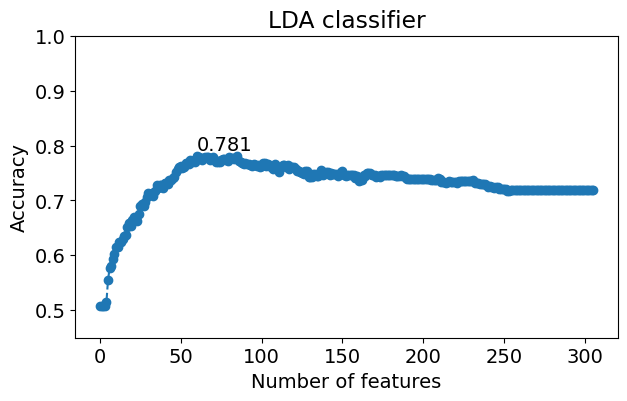

auc_best = 0.78084936
best auc (LDA) =  0.780849358974359 Number of features =  60
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #0: 0.781 <-> 0.781
Iter #1: 0.781 <-> 0.781
Iter #2: 0.781 <-> 0.781
Iter #3: 0.781 <-> 0.781
Iter #13: 0.781 <-> 0.781
Iter #26: 0.781 <-> 0.781
Iter #31: 0.782 <-> 0.781
Iter #40: 0.781 <-> 0.781
Iter #41: 0.782 <-> 0.781
Iter #47: 0.786 <-> 0.781
Iter #49: 0.783 <-> 0.781
Withdraw feature #47, added accracy 0.004807692307692291
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #0: 0.788 <-> 0.786
Iter #3: 0.786 <-> 0.786
Iter #15: 0.787 <-> 0.786
Iter #20: 0.786 <-> 0.786
Iter #21: 0.786 <-> 0.786
Iter #22: 0.786 <-> 0.786
Iter #23: 0.786 <-> 0.786
Iter #24: 0.786 <-> 0.786
Iter #27: 0.786 <-> 0.786
Iter #28: 0.789 <-> 0.786
Iter #42: 0.786 <-> 0.786
Iter #47: 0.789 <-> 0.786
Iter #57: 0.786 <-> 0.786
Iter #58: 0.786 <-> 0.786
Withdraw feature #47, added accracy 0.003405448717948678
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #0: 0.791 <-> 0.789
Iter #3: 0.790 <-> 0.789
Iter #20: 0.789 <-> 0.789
Iter #21: 0.789 <-> 0.789
Iter #22: 0.789 <-> 0.789
Iter #23: 0.789 <-> 0.789
Iter #24: 0.789 <-> 0.789
Iter #27: 0.792 <-> 0.789
Iter #28: 0.792 <-> 0.789
Iter #31: 0.789 <-> 0.789
Iter #50: 0.789 <-> 0.789
Iter #56: 0.789 <-> 0.789
Iter #57: 0.789 <-> 0.789
Withdraw feature #27, added accracy 0.0030048076923077094
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #20: 0.792 <-> 0.792
Iter #21: 0.792 <-> 0.792
Iter #22: 0.792 <-> 0.792
Iter #23: 0.792 <-> 0.792
Iter #24: 0.792 <-> 0.792
Iter #27: 0.792 <-> 0.792
Iter #49: 0.792 <-> 0.792
Iter #55: 0.792 <-> 0.792
Iter #56: 0.792 <-> 0.792
Withdraw feature #27, added accracy 0.0004006410256409687
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #3: 0.793 <-> 0.792
Iter #20: 0.792 <-> 0.792
Iter #21: 0.792 <-> 0.792
Iter #22: 0.792 <-> 0.792
Iter #23: 0.792 <-> 0.792
Iter #24: 0.792 <-> 0.792
Iter #54: 0.793 <-> 0.792
Iter #55: 0.793 <-> 0.792
Withdraw feature #3, added accracy 0.00040064102564107973
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #19: 0.793 <-> 0.793
Iter #20: 0.793 <-> 0.793
Iter #21: 0.793 <-> 0.793
Iter #22: 0.793 <-> 0.793
Iter #23: 0.793 <-> 0.793
Iter #47: 0.793 <-> 0.793
Iter #53: 0.793 <-> 0.793
Iter #54: 0.793 <-> 0.793
Iter #55: 0.794 <-> 0.793
Withdraw feature #55, added accracy 0.0008012820512820484
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #19: 0.794 <-> 0.794
Iter #20: 0.794 <-> 0.794
Iter #21: 0.794 <-> 0.794
Iter #22: 0.794 <-> 0.794
Iter #23: 0.794 <-> 0.794
Iter #53: 0.794 <-> 0.794
Withdraw feature #19, added accracy 0.0
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #19: 0.794 <-> 0.794
Iter #20: 0.794 <-> 0.794
Iter #21: 0.794 <-> 0.794
Iter #22: 0.794 <-> 0.794
Iter #52: 0.794 <-> 0.794
Withdraw feature #19, added accracy 0.0
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #19: 0.794 <-> 0.794
Iter #20: 0.794 <-> 0.794
Iter #21: 0.794 <-> 0.794
Iter #51: 0.794 <-> 0.794
Withdraw feature #19, added accracy 0.0
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #19: 0.794 <-> 0.794
Iter #20: 0.794 <-> 0.794
Iter #50: 0.794 <-> 0.794
Withdraw feature #19, added accracy 0.0
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)


Iter #49: 0.794 <-> 0.794
Withdraw feature #49, added accracy 0.0
NEW ROUND


C:\Users\Admin\AppData\Local\Temp\ipykernel_2936\2908209475.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_up = -np.ones_like(feature_ind).astype(np.float)
100%|██████████| 5/5 [00:00<00:00, 55.55it/s]


UAR = 0.404


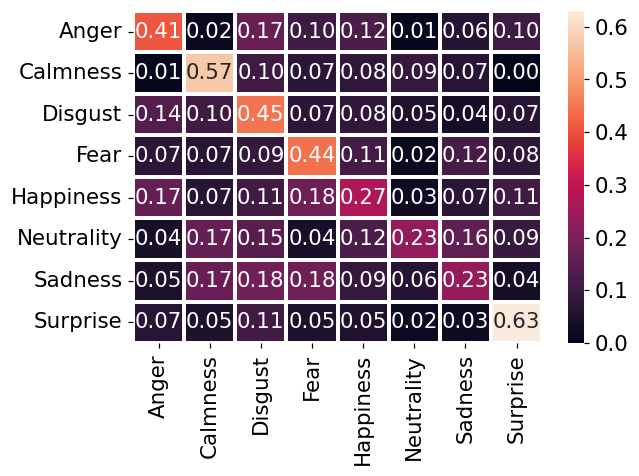

Saving confusion matrix with name:  confusion_matrix_LDA_surprised.jpg


In [59]:
# Emotion_label = 'happy'
# Emotion_label = 'neutral'
# Emotion_label = 'sad'

Emotions = ['calm','fear','disgust','surprised']

for Emotion_label in Emotions:
    # Relabeling and normilizing
    y_true = np.zeros((len(y)))
    y_true[np.squeeze(y.values==Emotion_label)] = 1
    y_true[y_true==0] = -1

    X_data = X.values
    X_norm = (X_data - X_data.mean(axis=0)) / X_data.std(axis=0)
    y_reg = copy.copy(y_true)

    # LASSO ranking
    Lasso_model = linear_model.Lasso()
    Npt = 200
    coeffs = np.zeros((X_norm.shape[1],Npt))
    lambda_ = np.logspace(-12.5, 0.3, Npt)
    i = 0
    for lamb in tqdm(lambda_):
        Lasso_model = linear_model.Lasso(alpha=lamb, max_iter=20000)
        Lasso_model.fit(X_norm,y_reg)
        coeffs[:,i] = Lasso_model.coef_
        i = i + 1

    plt.figure(dpi=110)
    plt.plot(coeffs.T)
    plt.xlabel('$\lambda$ number')
    plt.ylabel('Coeffs')
    plt.show()

    Rank_lasso = []
    for i in range(coeffs.shape[1]-1,-1,-1):
        withdraw_features = np.nonzero(coeffs[:,i])[0];
        something_new = np.setdiff1d(withdraw_features, Rank_lasso)
        if len(something_new):
            for ii in range(len(something_new)):
                Rank_lasso.append(something_new[ii])
    
    np.save(f'../data/Lasso_Ranking_LDA_{Emotion_label}_result.npy', Rank_lasso)    # .npy extension is added if not given
    Rank_lasso = np.load(f'../data/Lasso_Ranking_LDA_{Emotion_label}_result.npy')

    # LOSO accuracy estimation
    Rank = Rank_lasso
    auc_lda = []
    auc_best = 0
    ind_best = 0
    for k in tqdm(range(1,len(Rank)+1)):
        feature_inds = Rank[:k]
        auc = LDA_LOSO_eval(X_norm,y_reg, feature_inds, ID)    
        auc_lda.append(auc)
        if (auc>auc_best):
            auc_best = auc
            ind_best = k-1
            print('Iter = ', k, f' AUC = {auc:.4f}' )
    
    fig,ax=plt.subplots(figsize=(7,4),dpi=100)
    plt.rcParams.update({'font.size': 14})
    plt.plot(auc_lda,marker='o', linestyle='dashed')
    plt.text(ind_best, auc_best+0.01, f'{auc_best:.3f}')
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.title('LDA classifier')
    plt.ylim([0.45, 1.00])
    plt.show()
    
    print(f'auc_best = {auc_best:.8f}')
    print('best auc (LDA) = ', np.max(auc_lda), 'Number of features = ', np.argmax(auc_lda))

    # image_name = 'figures\\ACC_LDA_.jpg'
    # fig.savefig(image_name, bbox_inches='tight', pad_inches = 0.2)

    # Backward step selection
    ind_best = np.argmax(auc_lda)
    [acc_final,feature_ind] = back_step_selection_loso(X_norm, y_reg, Rank[:ind_best+1],ID)
    np.save(f'../data/feature_LDA_idx_{Emotion_label}.npy', feature_ind)    # .npy extension is added if not given
    feature_ind = np.load(f'../data/feature_LDA_idx_{Emotion_label}.npy')

    # 5-fold CV (selected feature space)
    group_members= data_loader.get_k_fold_group_member()
    X_new = pd.DataFrame(X_norm[:,feature_ind])
    X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
    model = LinearDiscriminantAnalysis()
    UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
    plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_{Emotion_label}.jpg')

# Backward step selection

In [49]:
def back_step_selection_loso(X,y,feature_ind, ID):
# BACK_STEP_SELECTION Automatic procedure of feature selection

#basic version
   acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
   some_feature_droped = True
   while (some_feature_droped):
      print('NEW ROUND')
      acc_up = -np.ones_like(feature_ind).astype(np.float)
      for i in range(len(feature_ind)):
         cur_inds = np.setdiff1d(feature_ind,feature_ind[i])
         acc_mu = LDA_LOSO_eval(X,y,cur_inds, ID)                  
         
         if (acc_mu>=acc_mu_curr):
            acc_up[i] = acc_mu-acc_mu_curr
            print(f'Iter #{i}: {acc_mu:.3f} <-> {acc_mu_curr:.3f}')
            
      m_val = np.max(acc_up)
      m_ind = np.argmax(acc_up)
      
      if (m_val>=0):
         print(f'Withdraw feature #{m_ind}, added accracy {m_val}')
         feature_ind = np.setdiff1d(feature_ind,feature_ind[m_ind]);
         some_feature_droped = True       
         # new basic version
         acc_mu_curr = LDA_LOSO_eval(X,y,feature_ind, ID)
      else:
         acc_final = acc_mu_curr
         some_feature_droped = False

   return acc_final, feature_ind

# 5-fold CV (full feature space)

In [55]:
group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm)
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)

100%|██████████| 5/5 [00:00<00:00,  6.45it/s]


UAR = 0.460


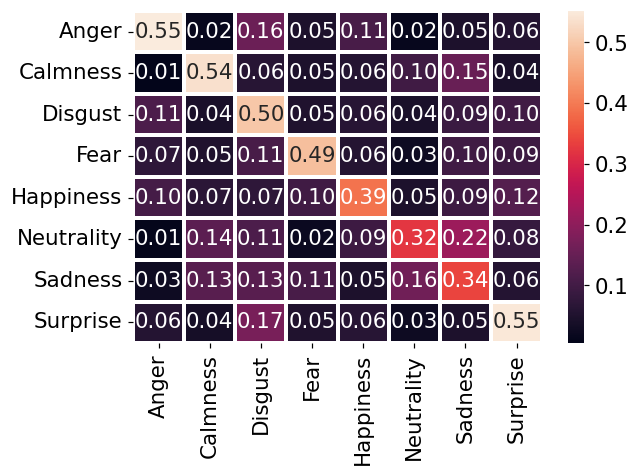

Saving confusion matrix with name:  confusion_matrix_LDA_full.jpg


In [56]:
model = LinearDiscriminantAnalysis()

UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
# Confusion matrix
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_full.jpg')

# Joint subset of features

100%|██████████| 5/5 [00:00<00:00,  7.43it/s]


UAR = 0.493


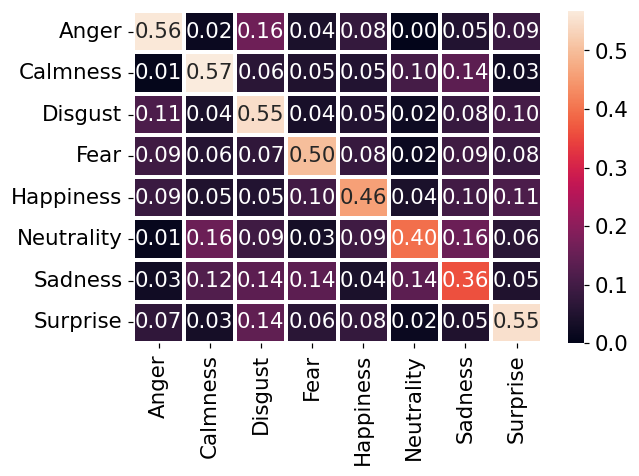

Saving confusion matrix with name:  confusion_matrix_LDA_joint_features.jpg


In [63]:
Emotions = ['happy','neutral','sad','calm','fear','disgust','surprised']
feature_joint_inds = []

for Emotion_label in Emotions:
    feature_ind = np.load(f'../data/feature_LDA_idx_{Emotion_label}.npy')
    feature_joint_inds = np.unique(np.concatenate((feature_joint_inds, feature_ind)))

feature_joint_inds = feature_joint_inds.astype(int)

group_members= data_loader.get_k_fold_group_member()
X_new = pd.DataFrame(X_norm[:,feature_joint_inds])
X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X_new, y, ID, group_members)
model = LinearDiscriminantAnalysis()
UAR,y_pred,y_true,y_test = model_training.estimate_model(model, X_k_folds, y_k_folds)
plotting_utils.plot_confusion_matrix_eng(y_test, y_true, y_pred,image_path=f'confusion_matrix_LDA_joint_features.jpg')